In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cars.csv')
df.head()

Matplotlib is building the font cache; this may take a moment.


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


### Dataset Used-cars-catalog

In [2]:
print(df.shape)

(38531, 30)


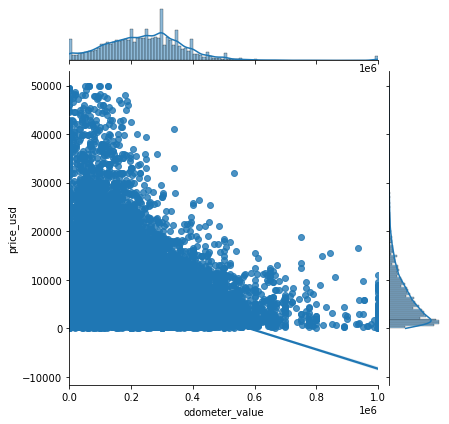

In [3]:
sns.jointplot(x='odometer_value', y='price_usd', 
              data=df, kind='reg')

Вывод: Стоимость машины зависит от пробега. Соответственно, чем больше пробег машины, тем меньше его стоимость.

In [4]:
top_car = df.groupby('manufacturer_name')[['price_usd']].sum()\
    .sort_values('price_usd', ascending = False).head()
top_car.style.bar()

,price_usd
manufacturer_name,
Volkswagen,27277833.640000
BMW,24924461.640000
Mercedes-Benz,21005020.790000
Audi,17658404.070000
Skoda,15023243.380000


Вывод: По стоимости всех подержанных машин, машины марки Volkswagen имеют самую высокую цену.

<AxesSubplot:ylabel='model_name'>

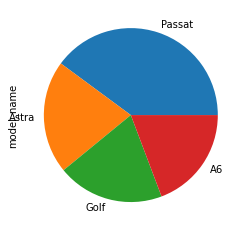

In [5]:
name_popularity = df['model_name'].value_counts().head(4)
name_popularity.plot(kind='pie', rot='45', y='Count')

Вывод: Самая популярная модель машин, машины марки Volkswagen Passat.

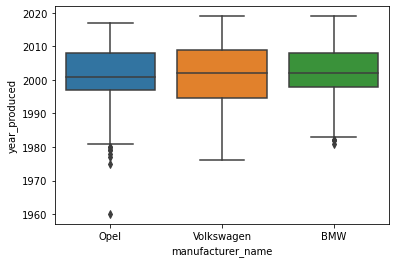

In [6]:
top_name = df.manufacturer_name.value_counts().sort_values(ascending=False).head(3).index.values
top_name
ax = sns.boxplot(x="manufacturer_name", y="year_produced", 
            data=df[df.manufacturer_name.isin(top_name)])

Вывод: Все машины практически одной даты выхода.

<AxesSubplot:xlabel='manufacturer_name'>

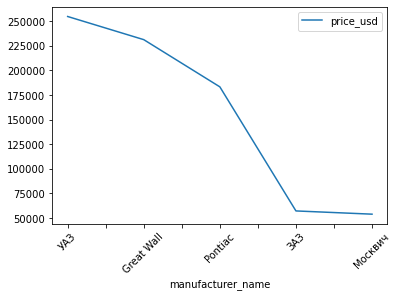

In [7]:
df1 = df.groupby('manufacturer_name')[['price_usd']].sum()\
    .sort_values('price_usd', ascending = False).tail()
df1.plot(rot=45)

Вывод: Среди всех бюджетных подержанных машин, машины марки ЗАЗ и Москвич имеют самую низкую цену.

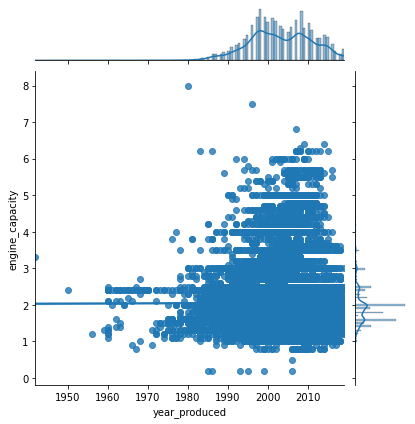

In [8]:
sns.jointplot(x='year_produced', y='engine_capacity', 
              data=df, kind='reg')

Вывод: С течением времени растет мощность двигателя машин.

In [9]:
price_color = df.pivot_table(
                        index='manufacturer_name', 
                        columns='color', 
                        values='price_usd', 
                        aggfunc=sum).fillna(0).applymap(float)

price_color

color,black,blue,brown,green,grey,orange,other,red,silver,violet,white,yellow
manufacturer_name,,,,,,,,,,,,
Acura,359799.00,50599.00,0.00,0.00,216704.43,0.00,34900.00,2350.00,89159.04,0.00,89499.00,0.00
Alfa Romeo,138624.78,86381.89,27150.00,28002.14,35050.00,0.00,28475.59,88341.97,111968.31,3035.19,9500.00,0.00
Audi,6898989.72,1572788.48,648740.50,438085.12,2076159.08,0.00,1100312.09,536244.00,2506968.27,122931.00,1754137.31,3048.50
BMW,10358906.89,2838015.32,805165.00,508021.62,2891935.70,39700.00,1033355.34,611327.53,2412839.05,153817.63,3237777.56,33600.00
Buick,156439.00,23300.00,44500.00,0.00,59899.00,0.00,42749.00,29350.00,96000.00,0.00,152950.00,0.00
Cadillac,217048.00,0.00,17333.77,2500.00,46034.92,0.00,51650.00,31500.00,62538.67,0.00,48399.00,0.00
Chery,79550.00,17449.00,11500.00,4299.00,11900.00,4173.38,11952.44,34150.19,41965.70,0.00,39627.02,7100.00
Chevrolet,1205079.35,269529.11,75200.00,40450.00,412904.00,20000.00,240051.61,266003.35,521404.13,5900.00,797614.00,14550.00
Chrysler,433671.41,286131.96,48556.70,140283.91,224654.99,5400.00,243285.95,71447.00,427317.10,43175.61,121727.00,2500.00


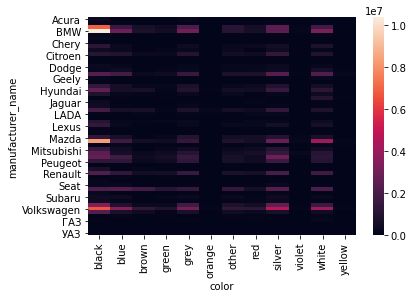

In [15]:
ax = sns.heatmap(price_color)

Вывод: Машины черного, белого и серого цветов имеют самую высокую цену.

In [16]:
data= df.groupby('manufacturer_name')[['odometer_value','year_produced', 'engine_capacity','price_usd']].sum()\
     .sort_values('price_usd', ascending=False)
data.head()

,odometer_value,year_produced,engine_capacity,price_usd
manufacturer_name,,,,
Volkswagen,1163768760,8493366,7974.400,27277833.64
BMW,720242322,5226687,6858.900,24924461.64
Mercedes-Benz,684900519,4477680,5915.961,21005020.79
Audi,695775678,4936246,5686.200,17658404.07
Skoda,131452387,2191838,1754.100,15023243.38


array([[<AxesSubplot:xlabel='odometer_value', ylabel='odometer_value'>,
        <AxesSubplot:xlabel='year_produced', ylabel='odometer_value'>,
        <AxesSubplot:xlabel='engine_capacity', ylabel='odometer_value'>,
        <AxesSubplot:xlabel='price_usd', ylabel='odometer_value'>],
       [<AxesSubplot:xlabel='odometer_value', ylabel='year_produced'>,
        <AxesSubplot:xlabel='year_produced', ylabel='year_produced'>,
        <AxesSubplot:xlabel='engine_capacity', ylabel='year_produced'>,
        <AxesSubplot:xlabel='price_usd', ylabel='year_produced'>],
       [<AxesSubplot:xlabel='odometer_value', ylabel='engine_capacity'>,
        <AxesSubplot:xlabel='year_produced', ylabel='engine_capacity'>,
        <AxesSubplot:xlabel='engine_capacity', ylabel='engine_capacity'>,
        <AxesSubplot:xlabel='price_usd', ylabel='engine_capacity'>],
       [<AxesSubplot:xlabel='odometer_value', ylabel='price_usd'>,
        <AxesSubplot:xlabel='year_produced', ylabel='price_usd'>,
        <AxesSu

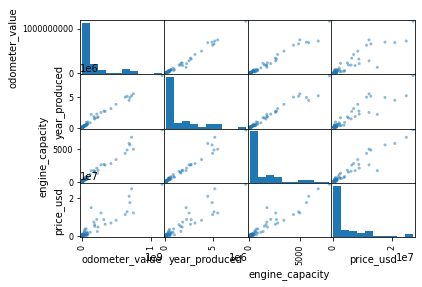

In [17]:
pd.plotting.scatter_matrix(data, alpha=0.5)

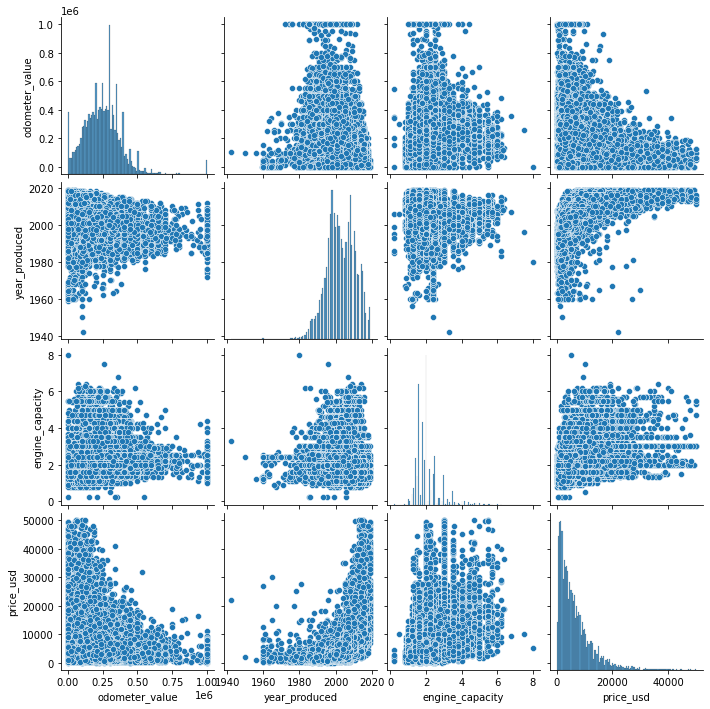

In [50]:
sns_plot = sns.pairplot(
    df[['odometer_value','year_produced', 'engine_capacity','price_usd']])
sns_plot

Вывод: 1) Чем больше пробег машины, тем меньше его стоимость. 2) Чем больше год выпуска машины, тем меньше его стоимость (исключение - раритет). 3) Чем меньше мощность машины, тем больше пробега (у старых машин большой пробег и малая мощность).